<div class="text-center">
<br><br><br><br>
<span><img src="img/logo_inpe.png" style="height: 85px;"></span>
<br><br><br><br>
<span style="font-size:22pt;font-family:verdana;line-height:35px">INPE<BR>Instituto Nacional de Pesquisas Espaciais</span>
<br><br>
<span style="font-size:14pt;font-family:verdana;line-height:35px">CAP394 - Introduction to Data Science</span>
<br><br><br><br>
<span style="font-size:22pt;font-family:verdana;line-height:35px"><b>Cálculo e validação da temperatura da superfı́cie do mar <br>através de dados do satélite GOES-16<b></span>
<br><br><br><br>
    <span style="font-size:14pt;font-family:verdana;line-height:35px"><i>Rogério da Silva Batista</i></span>
<br><br><br><br><br><br>
    <span style="font-size:12pt;font-family:verdana;line-height:20px"><b>Professores:</b><br>Rafael Santos <br>Gilberto Ribeiro de Queiroz</span>
<br><br><br><br><br><br>
    <span style="font-size:12pt;font-family:verdana;line-height:25px">Setembro/2018</span>

</div>




# 1. Introdução
<hr style="border:1px solid #0077b9;">

Segundo Kidder[1], desde 1970 a <i>National  Oceanis  and  Atmospheric  Administration</i>(NOAA) produz operacionalmente dados de temperatura da superfície do mar (SST), que é objeto de estudo de correlações com uma grande variedade de eventos oceanográficos, meteorológicos e climáticos, como geração e intensificação de furacões e ciclones [2], os fenômenos el nino e la nina [3], entre outros. Assim, ter um produto de SST com boa qualidade é essencial para melhores previsões e monitoramento do ambiente.
<br>
    Esse trabalho consiste na geração da SST utilizando dados do satélite GOES-16, centrado em -75.2° oeste em longitude e operacional pela NOAA desde dezembro de 2017, este satélite nesta posição cobre toda a América do Sul, América Central e parte da América do Norte com resolução espacial nos canais termais de 2km no nadir e resolução temporal de 15 minutos, podendo operar a 5 minutos em modo de escaneamento rápido. Ao mesmo serão utilizados dados de boias meteorológicas localizadas na costa brasileira, afim de através de métodos de regressão obter o melhor algoritmo para a costa do Brasil.   

# 2. Revisão Bibliográfica
<hr style="border:1px solid #0077b9;">

## 2.1  Boias Meteorologicas

Boias meteorológicas (ou boias coletoras de dados) são instrumentos que coletam dados meteorológicos  e  oceânicos,  bem  como  emitem  avisos  de  emergência  a  vazamentos  de produtos químicos, executam procedimentos legais e participam de projetos de engenharia[4].  Essas boias podem ser ancoradas e bem grandes, localizadas mais próximas à costa ou serem bem menores e flutuarem livremente em mar aberto [5]. De acordo com o <i>Data Buoy Cooperation Panel</i>(DBCP), independentemente de estarem flutuando ou ancoradas, as boias de dados medem e transmitem automaticamente, de maneira previsível e controlada, em tempo real por meio de sistemas de telecomunicações via satélite. Basicamente, temos dois tipos de boias coletoras de dados[6]:

- `Boias flutuantes ou boias de deriva`: São, geralmente, acopladas a alguma forma de âncora flutuante. De fácil implantação e relativamente baratas de operar, medem com confiabilidade as condições da atmosfera e da superfície oceânica por uma média de 18 meses. Têm uma longa história de uso na oceanografia, principalmente para a medição de correntes. Muitos tipos de boias flutuantes também são usadas para fins meteorológicos.

- `Boias ancoradas ou boias fixas`: Tem localização inerte e coletam regularmente observações de diversos sensores atmosféricos e oceanográficos. Coletam variáveis de superfície como vento, temperaturas do mar e do ar, salinidade e pressão atmosférica, assim como temperaturas bem abaixo da superfície do oceano. São geralmente utilizadas para atender às necessidades da previsão do tempo, necessidades de segurança marítima ou para observar padrões climáticos regionais. Boias desse tipo são normalmente plataformas relativamente grandes e caras. Elas podem variar de alguns metros de altura e largura a mais de 12 metros. Elas precisam serconstruídos com materiais muito resistentes para evitar problemas com tempestades em alto-mar e a linha que prende a boia no local desejado precisa ser especialmente forte. O projeto também precisa prever vandalismo intencional ou danos acidentais. Muitos projetos diferentes existem para boias fixas dependendo da área do oceano. 

No presente trabalho, foram usados os  dados do [Programa Nacional de Boias (PN-BOIA)](http://www.goosbrasil.org/pnboia/), que conta atualmente com 20 boias fixas e 297 boias de deriva.

## 2.2  GOES

De acordo com a <i>National Aeronautics and Space Administration </i>(NASA), o programa <i>Geostationary  Operational  Environmental  Satellite </i>(GOES) e um esforço conjunto da [NASA e da NOAA](https://www.nasa.gov/content/goes-overview/index.html). Atualmente, cinco satélites GOES estão em órbita neste momento:

- `GOES-13`: Reserva, em órbita;
- `GOES-14`: Reserva, em órbita;
- `GOES-15`: Ativo como "GOES-oeste";
- `GOES-16`: Ativo como "GOES-leste";
- `GOES-17`: Em fase de testes.

De acordo com a [NOAA](https://www.ospo.noaa.gov/Operations/GOES/index.html), os satélites da família GOES circulam a Terra em uma ́órbita geossíncrona, o que significa que eles orbitam o plano equatorial a uma velocidade que coincide com a rotação do nosso planeta, o que os permitem pairar continuamente sobre  uma  posição  na  superfície. O plano geossíncrono está a cerca de 35.800km de altitude, o que permite aos satélites uma visão completa da Terra. 
Como os satélites GOES ficam acima de um ponto fixo na superfície, eles fornecem uma vigília constante para os "gatilhos" atmosféricos para condições climáticas severas, como tornados, inundações repentinas, tempestades de granizo e furacões. Quando essas condições se desenvolvem, os satélites GOES são capazes de monitorar o desenvolvimento de tempestades e rastrear seus movimentos. Imagens de satélite GOES também são usadas para estimar as chuvas durante as tempestades e furacões para alertas de enchentes, bem como estimativas de acumulações de neve e extensão total da cobertura de neve. 
As imagens geradas pelos satélites GOES são divididas em canais. No satélite GOES-16 por exemplo, temos [16 canais de imagem](https://www.star.nesdis.noaa.gov/GOES/FullDisk.php?sat=G16), divididos em diferentes espectros variadede 0.47μm a 13.3μm.

# 3. Metodologia
<hr style="border:1px solid #0077b9;">

Os dados utilizados neste trabalho para a geração da SST são principalmente o canal 14 (11.2μm) e o canal 15 (12.3 μm) do satélite geoestacionário GOES-16 entre o período de 01 de Janeiro de 2018 a 31 de Julho de 2018. Este satélite é o primeiro da nova geração de satélites geoestacionários da NOAA, lançado em 19 de Novembro de 2016 e declarado operacional em 18 de Dezembro de 2017. Possui uma gama de instrumentos e sensores, alguns deles  operando pela primeira vez no espaco, sendo o principal denominado de [<i>Advanced Baseline Imager</i> (ABI)](https://www.goes-r.gov/spacesegment/abi.html) capaz de observar a terra em 16 diferentes bandas espectrais, sendo 2 no espectro do visível, 4 no infra vermelho próximo e 10 canais infra-vermelhos.O algoritmo utilizado neste trabalho foi originalmente proposto por Sobrino & Romanera [14], sendo versátil para ser utilizado em toda a superfície da Terra, e posteriormente (Romanera et al., 2006), utilizando valores de emissividade propostos em um estudo realizado por Masuda et al.[15], foi adaptado para poder ser aplicado no oceano [16].

## 3.1 A equação de Romanera

Consideremos a equação, proposta por Romanera:

$$
SST = T14+(0.99*cos(zen)+0.21)*(T14-T15)+(\frac{0.364}{cos(zen)}+0.15)*(T14-T15)^2+(\frac{0.327}{cos^2(zen)}+0.11)
$$

onde:
- **$SST$:** é a estimativa da temperatura da superfície do mar em Kelvin.
- **$T14$:** é a temperatura de brilho no canal 14(11.2μm) em Kelvin.
- **$T15$:** é a temperatura de brilho no canal 10(12.3μm) em Kelvin.
- **$zen$:** é o ângulo zenital do satélite.

Os  dados  do  ABI  em  formato  [netCDF-4](https://www.unidata.ucar.edu/software/netcdf/netcdf-4/newdocs/netcdf/NetCDF_002d4-Format.html) e  [projeção  geoestacionária](https://proj4.org/operations/projections/geos.html),  foram adquiridos na [Divisão de Satélites e Sistemas Ambientais (DSA)](http://satelite.cptec.inpe.br/home/index.jsp) do [Centro de Previsão de Tempo e Estudos Climáticos (CPTEC)](https://www.cptec.inpe.br/), também disponibilizados on-line pela [NOAA](http://www.class.noaa.gov/).

## 3.2 Quanto à remoção de nuvens

Ao aplicar a equação sobre os canais termais, o algoritmo não faz distinção do que é nuvem e o que é superfície, portanto para obter um dado válido de SST é preciso antes de aplicar a equação remover dos canais termais as áreas afetadas por nuvens. Para isso foi utilizado um produto, denominado [<i>ABI  Clear  Sky  Mask </i>(ACM)](https://www.star.nesdis.noaa.gov/goesr/product_cp_clearskymask.php), onde os pixeis representam duas classes:

- **$0$:** Céu claro / Possível céu claro
- **$1$:** Nuvem / Possível nuvem


## 3.3 O cálculo do ângulo zenital e o teste de eficácia do algoritmo
<br><br>
<figure>
    <img src="img/Angles.png" alt="" width="600">
    <figcaption style="text-align: center">
        **Figura 1** - Angulos entre Terra, Sol e satélite. As linhas sólidas (e curvas) representam o angulo zenital solar θo, o angulo zenial do satélite θs (medidos a partir do zênite, Z), as linhas tracejadas (e curvas) representam o ângulo de azimute relativo Φ (medido a partir da extensão do azimute solar), e as linhas pontilhadas (e curvas) representam o ângulo de espalhamento Θ (medido a partir da extensão do feixe direto)<br>**Fonte** - https://darktarget.gsfc.nasa.gov/atbd/aerosol-optics-retrieval-strategy
    </figcaption>
</figure>
<br><br>

O algoritmo de Romanera utiliza o ângulo zenital do satélite para o ponto observado, θs da Figura 1, que foi calculado utilizado as equações fornecidas pela [<i>GEOSAT Data Archive Service</i>(GDAS)](https://data2.gosat.nies.go.jp/doc/faq/FAQ_No13_en.pdf). 

<br><br>
<figure>
    <img src="img/Boias.png" alt="" width="600">
    <figcaption style="text-align: center">
        **Figura 2** - Dados das boias que operarão na região oceânica e costeira do Brasil em 2018 <br>**Fonte** - http://www.goosbrasil.org/pnboia/dados/
    </figcaption>
</figure>
<br><br>

Para obter uma métrica da eficácia do algoritmo foram utilizados medições de boias meteorológicas fixas e de deriva do [PNBOIA](https://www.marinha.mil.br/chm/dados-do-goos-brasil/pnboia) que opera em areas oceânicas de interesse do Brasil. No período avaliado foram obtidos 8718 medições válidas na região destacada na Figura 2.

## 3.4  Considerações sobre a metodologia utilizada

Para o presente desenvolvimento, foram utilizadas as ferramentas computacionais [tcsh](http://www.tcsh.org/), [Fortran90](http://www.fortran90.org/), [GDAL](https://www.gdal.org/), [Generic  Mapping  Tools(GMT)](http://gmt.soest.hawaii.edu/), [ImageMagick](https://www.imagemagick.org) e a [linguagem R](https://www.r-project.org/). 

Todas os dados utilizados são públicos assim como todas as ferramentas utilizadas são open source. A área geográfica de estudo é denominada [METAREA-V](http://www.wmo.int/pages/prog/www/ois/Operational_Information/VolumeD/GMDSS/Metarea5/Metarea5.html) destacado em amarelo na  Figura 3, que consiste em uma área marítima reconhecida internacionalmente ao qual o Brasil é responsável por elaborar e disseminar previsões meteorológicas e alertas de mau tempo. A região concentra-se entre -46° e 9° em latitude e -69° e -18° em longitude.

<br><br>
<figure>
    <img src="img/Metarea_v.jpg" alt="" width="600">
    <figcaption style="text-align: center">
        **Figura 3** - Metarea-V <br>**Fonte** - https://www.marinha.mil.br/chm/sites/www.marinha.mil.br.chm/files/imagens_meteorologia/metarea_v.jpg
    </figcaption>
</figure>
<br><br>


# 4. Desenvolvimento
<hr style="border:1px solid #0077b9;">

## 4.1 <i>Fitting</i> dados de boias

Considerando a resolução temporal das boias que em média transmitem a cada 1 hora e a quantidade de pixeis comparado com os dados de satélites, o tratamento começou por esses dados, filtrando os valores válidos dentro do período e área geográfica estabelecidos. 
Os dados das boias foram adquiridos através da internet pelo página [GOOS-Brasil] (http://www.goosbrasil.org/pnboia/dados/), responsável, segundo a descrição do próprio site, pela coleta, controle de qualidade, distribuição operacional de dados oceanográficos e monitoramento oceanográfico e climatológico no Atlântico Sul e tropical, para aquisição, foi realizado um cadastro e a requisição feita no próprio portal através de uma interface, contudo a única forma de filtragem era por boia com informações sobre o periodo inicial e final em que a boia transmitiu informações, considerando isso foi baixado dados de todas as boias que operaram no periodo da pesquisa, independente do local. Ao todo foram coletados dados de 27 boias separados em arquivos no formato csv em geral com dados desde Março de 2015.


In [1]:
dados <- read.csv(file="boias/B116969.csv", header=TRUE, sep=",")

In [2]:
head(dados)

id_argos,id_wmo,yyyy,mm,dd,hour,min,lon,lat,temp,⋯,zh,zc,bt,xt,ah,an,vb,db,vivivivi,zd
116969,31536,2015,4,6,20,0,-31.805,-32.494,23.0,⋯,-99999,-99999,1,1,-99999,-99999,-99999,-99999,5,15
116969,31536,2015,4,6,21,0,-31.810,-32.499,23.0,⋯,-99999,-99999,1,1,-99999,-99999,-99999,-99999,5,15
116969,31536,2015,4,6,22,0,-31.810,-32.499,22.9,⋯,-99999,-99999,1,1,-99999,-99999,-99999,-99999,5,15
116969,31536,2015,4,6,23,0,-31.788,-32.515,22.9,⋯,-99999,-99999,1,1,-99999,-99999,-99999,-99999,11,15
116969,31536,2015,4,7,0,0,-31.777,-32.520,23.0,⋯,-99999,-99999,1,1,-99999,-99999,-99999,-99999,11,15
116969,31536,2015,4,7,1,0,-31.773,-32.527,23.0,⋯,-99999,-99999,1,1,-99999,-99999,-99999,-99999,11,15


<br>
Cada arquivo csv dividido com as seguintes váriaveis:
<br>

In [3]:
colnames(dados)

[1] "id_argos"   "id_wmo"     "yyyy"       "mm"         "dd"        
  [6] "hour"       "min"        "lon"        "lat"        "temp"      
 [11] "wind_int"   "wind_dir"   "temp_air"   "dew_point"  "press"     
 [16] "dif_press"  "tend_press" "z1_corr"    "dir1_corr"  "int1_corr" 
 [21] "z2_corr"    "dir2_corr"  "int2_corr"  "z3_corr"    "dir3_corr" 
 [26] "int3_corr"  "z4_corr"    "dir4_corr"  "int4_corr"  "z5_corr"   
 [31] "dir5_corr"  "int5_corr"  "z6_corr"    "dir6_corr"  "int6_corr" 
 [36] "z7_corr"    "dir7_corr"  "int7_corr"  "z8_corr"    "dir8_corr" 
 [41] "int8_corr"  "z9_corr"    "dir9_corr"  "int9_corr"  "z10_corr"  
 [46] "dir10_corr" "int10_corr" "z1_ts"      "t1_ts"      "s1_ts"     
 [51] "z2_ts"      "t2_ts"      "s2_ts"      "z3_ts"      "t3_ts"     
 [56] "s3_ts"      "z4_ts"      "t4_ts"      "s4_ts"      "z5_ts"     
 [61] "t5_ts"      "s5_ts"      "z6_ts"      "t6_ts"      "s6_ts"     
 [66] "z7_ts"      "t7_ts"      "s7_ts"      "z8_ts"      "t8_ts"     
 [71] "s8_ts"      "z9_ts"      "t9_ts"      "s9_ts"      "z10_ts"    
 [76] "t10_ts"     "s10_ts"     "iw"         "qi"         "qt"        
 [81] "qa"         "qx_met"     "qd_met"     "qx_oc"      "qd_oc"     
 [86] "qd1"        "qd2"        "k2"         "k6"         "k3"        
 [91] "qp"         "q2"         "qtw"        "q4"         "qn"        
 [96] "ql"         "qz"         "yyyy_last"  "mm_last"    "dd_last"   
[101] "hour_last"  "min_last"   "lon_sec"    "lat_sec"    "zh"        
[106] "zc"         "bt"         "xt"         "ah"         "an"        
[111] "vb"         "db"         "vivivivi"   "zd"

<br>
Sendo que as que nos interessam são as que armazenam a localização temporal: <i>yyyy, mm, dd, hour e min</i>, as que armazenam a localização espacial: <i>lat e lon</i>, e a váriavel que armazena o valor da SST, no caso <i>temp</i>, isto para o ano de 2018 de janeiro a julho e para região de interesse.

<br>

In [4]:

path <- "boias/"
files <- list.files(path=path, full.names=TRUE, pattern="*.csv")

df <- data.frame(matrix(ncol = 4, nrow = 0))
x <- c("datahora", "lon", "lat", "sst_boia")
colnames(df) <- x

for(filecsv in files)
{
  dados <- read.csv(file=filecsv, header=TRUE, sep=",")
  
  dados <- subset(dados, (dados$yyyy==2018) & (dados$mm<=7))
  dados <- subset(dados, (dados$lat>=-46.0) & (dados$lat<=9.0) & (dados$lon>=-69.0) & (dados$lon<=-18.0))
  
  datahora <- as.POSIXct( paste( dados$yyyy, dados$mm , dados$dd, dados$hour, dados$min )  , format = "%Y%m%d%H%M" )

  dados_new <- data.frame(datahora=(datahora), lon=(dados$lon), lat=(dados$lat), sst_boia=(dados$temp))
  df <- rbind(df,dados_new)
}

outcsv <- paste("dados/tabela.csv", sep="")
write.csv(df, file=outcsv)

head(df)

datahora,lon,lat,sst_boia
2018-01-03 13:00:00,-25.256,-26.915,24.3
2018-01-03 17:00:00,-25.162,-26.990,24.5
2018-01-03 18:00:00,-25.123,-27.004,24.5
2018-01-03 19:00:00,-25.123,-27.004,24.5
2018-01-03 21:00:00,-25.109,-27.009,24.4
2018-01-03 22:00:00,-25.109,-27.009,24.3


<br>
Com o processamento acima reduzimos o número de observações apenas para o período e região de interesse, consequentemente as imagens de satélite foram processadas apenas para os dias em que houveram medições.
<br>

## 4.2 Remoção das Nuvens

A primeira operação realizada nos dados de satélite foi a remoção das áreas afetadas por nuvens, para isso foi adquirido junto a [NOAA](https://www.avl.class.noaa.gov) o produto ACM que também é proveniente do GOES-16, mesmo  satélite gerados dos canais termais utilizados, sendo assim as características dos dois produtos, como resolução e  limites geográficos são iguais. Portanto, para o calculo não foi necessário remapear nenhum dos dois produtos. No  ACM os pixeis correspondentes a nuvem tem o valor 1 e céu claro 1. Assim, o processamento para remoção das nuvens consistiu basicamente de inverter os valores e multiplica-los pelos canais termais, os pixeis correspondentes a nuvem passam a ser 0 e os demais correspondentes a superfície se mantém.

Para isso foi utilizado o aplicativo GMT, mais especificamente o comando <i>grdmath</i>:
<br><br><br>
<div class="text-center">
  <span style="font-size:14pt;font-family:verdana;line-height:35px">
    <i>gmt grdmath <ACMF.nc\> NOT <ABI.nc\> MUL = <OUT.nc\></i>
  </span>
</div>
        
        
onde:
- **$ACMF.nc$:** é a máscara de nuvem no formato NetCDF.
- **$ABI.nc$:** é a temperatura de brilho no formato NetCDF.
- **$OUT.nc$:** é a temperatura de brilho no formato NetCDF sem nuvens.


## 4.3 Limitando a área do mapa para METAREA-V

Para extração da área de interesse, METAREA-V, foi utilizada a ferramenta <i>gdalwarp</i> sobre os canais termais, os dados também foram reprojetados e interpolas para uma grade com espaçamento regular:

<br>
<div class="text-center">
  <span style="font-size:12pt;font-family:verdana;line-height:35px">
<i>
gdalwarp 
    -s_srs <PROJ_INPUT\> -te <LONI\> <LATI\> <LONF\> <LATF\> -t_srs <PROJ_OUTPUT/> <INPUT\> -of <FORMAT\> <OUTPUT\>    </i>
<br>
</span>
</div>

onde:
- **$PROJ\_INPUT$:** é a projeção do arquivo de entrada, nesse caso: 
<div class="text-center">"+proj=geos +lon_0=-75.2 +h=35786023.0 +a=6378137.0 +b=6356752.31414 +units=m +sweep=x +no_defs"</div><br>
- **$LONI, LONF, LATI e LATF$:** são os limites da área recortada
- **$PROJ\_OUTPUT$:** é a projeção do arquivo de saída, nesse caso: "+proj=latlong +datum=WGS84"
- **$FORMAT$:** formato do arquivo de saída
- **$INPUT e OUTPUT$:** são respectivamente o nome dos arquivos de entrada e saída


## 4.4 Angulo Zenital do Satélite

A equação de Romanera utilizada neste trabalho depende da variável do angulo zenital do satélite, esse angulo é calculado em função do ponto de grade e da posição do satélite. Como durante todo o período da pesquisa esses valores foram os mesmos, a grade com os angulos foi calculada uma única vez e utilizada a cada iteração. Esse cálculo foi realizado com um programa feito em Fortran90 que basicamente implementa a equação fornecida pela [GDAS](https://data2.gosat.nies.go.jp/doc/faq/FAQ_No13_en.pdf):

  <span style="font-size:12pt;font-family:verdana;line-height:35px">
<i>
REAL, PARAMETER :: a=6378140.0, f=.00335281, b=6356750.0, HS=35786000.0<br>
REAL, PARAMETER :: rad=0.017453293, H=0<br>

xlat = yori - ( i - 1 ) \* resy<br>
xlon = xori + ( j - 1 ) \* resx<br>

ylat = xlat\*rad<br>
ylon = xlon\*rad<br>

N = a\*\*2/SQRT(a\*\*2\*((1+COS(2\*ylat))/2)+b\*\*2\*(1-((1+COS(2\*ylat))/2)))<br>

xp = (N+H)\*COS(ylat)\*COS(ylon)<br>
yp = (N+H)\*COS(ylat)\*SIN(ylon)<br>
zp = ((b\*\*2/a\*\*2)\*N+H)\*SIN(ylat)<br>

nx = xp/a\*\*2<br>
ny = yp/a\*\*2<br>
nz = zp/b\*\*2<br>

xd = -75.2\*rad-xp<br>
yd = 0\*rad-yp<br>
zd = HS-zp<br>

cosz = (xd\*nx+yd\*ny+zd\*nz)/(SQRT(xd\*\*2+yd\*\*2+zd\*\*2)\*SQRT(nx\*\*2+ny\*\*2+nz\*\*2))<br>
az(j,i) = ACOS(cosz)<br>

   </i>
<br>
</span>


## 4.5 Juntando tudo

Tendo essas coleções de dados de satélite e de boias, foi realizado um processamento para relaciona-las em uma única tabela. Para isso, foi verificado nos dados de satélite, com auxilio da ferramenta <i>gdallocationinfo</i>, cada coordenada geográfica de cada medida de boia, procurando um dado válido, uma vez que ambos os dados existam para o mesmo local e horário, essas informações são separadas juntamente coma média dos 9 pixeis ao redor do pixel medido pelo satélite, incluindo ele próprio para remoção de possíveis ruídos.

<br>
<div class="text-center">
  <span style="font-size:12pt;font-family:verdana;line-height:35px">
    <i>gdallocationinfo <INPUT\> -geoloc <LON\> <LAT\> </i>
  </span>
</div>
<br>

onde:
- **$INPUT$:** é o arquivo de entrada, em formato netCDF
- **$LON e LAT$:** é a coordenada geográfica do ponto ao qual se deseja o valor


Por fim todos os dados foram salvos em uma tabela:

In [5]:
tabela <- read.csv(file="dados/tabela_final.csv", header=TRUE, sep=",")
head(tabela)

datahora,lat,lon,sst_boia,ch14,media14,ch15,media15,sat_zen
2.01801e+11,-33.017,-20.752,21.1,286.6949,287.2070,283.5671,284.0965,2.282356
2.01801e+11,-26.990,-25.162,24.5,288.1313,266.7646,284.4605,263.6473,2.187729
2.01801e+11,-33.767,-40.961,20.4,288.3109,202.9903,285.8900,202.1607,2.294163
2.01801e+11,-27.004,-25.123,24.5,288.0715,288.0715,284.4010,284.4407,2.187729
2.01801e+11,-27.004,-25.123,24.5,288.3109,288.3109,284.6988,284.6789,2.187729
2.01801e+11,-33.767,-40.961,20.5,287.5927,202.7443,285.1753,201.8894,2.294163


## Executando ajustes

Do processamento acima foram levantados 8649 observações, com esses dados foi gerado um gráfico das diferenças entre temperatura do pixel e média ao redor do pixel, para os 2 canais termais:


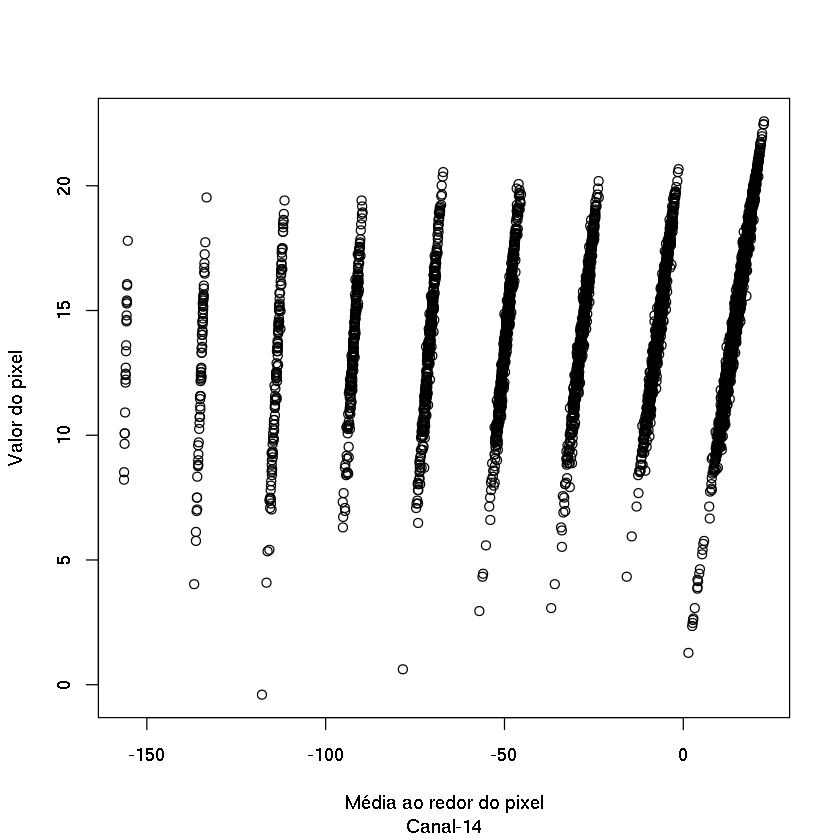

In [6]:
plot(tabela$media14-273.15, tabela$ch14-273.15, ylab="Valor do pixel", xlab="Média ao redor do pixel", sub="Canal-14")

No eixo da média observamos muitos valores abaixo de 0°C, o que e incomum para asuperfície da área de estudo, contudo são valores típicos de nuvens, o que significa que o valor do pixel pode estar comprometido, mesmo multiplicando pelo ACM, lembrando que os valores do ACM eram descritos como nevem ou possível nuvem. Baseado nisso, foi feita uma eliminação das observações com diferenças entre pixel e média maior que 1°C para mais ou para menos. Para este cálculo foi utilizado os comandos abaixo:

In [7]:
tabela$dif_ch14 <- (tabela$media14-273.15)-(tabela$ch14-273.15)
tabela <- subset(tabela, (tabela$dif_ch14>=-1 & tabela$dif_ch14<=1))

tabela$dif_ch15 <- (tabela$media15-273.15)-(tabela$ch15-273.15)
tabela <- subset(tabela, (tabela$dif_ch15>=-1 & tabela$dif_ch15<=1))

Após a eliminação dos valores indesejados o gráfico foi novamente plotado e o resultado aparente é uma tendência, o que leva a entender que o valor do pixel esta compatível comos vizinhos. Além disso os valores menores que zero foram eliminados reforçando a análise anterior

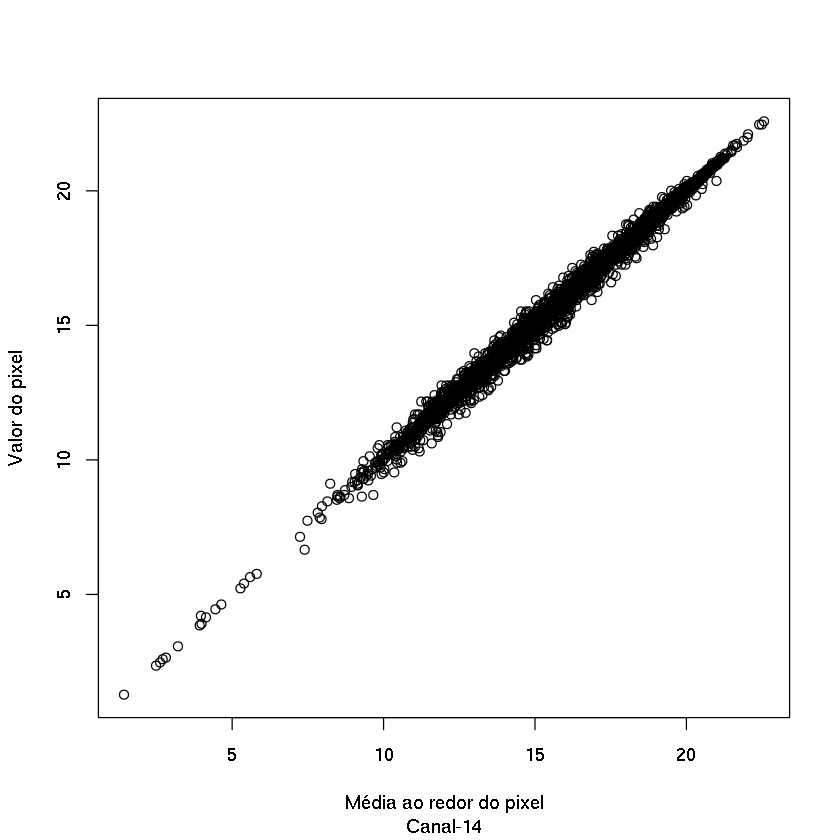

In [8]:
plot(tabela$media14-273.15, tabela$ch14-273.15, ylab="Valor do pixel", xlab="Média ao redor do pixel", sub="Canal-14")

No processo acima foram eliminados 2753 observações, restando um total de 5892 observações que foram separados em dois blocos aleatórios, um com 70%, ou 4124 observações, utilizadas na regressão do algoritmo para treinamento, e  outro com os 30% restantes, ou 1768 observações, para o teste de eficiência.

In [9]:
ordena <- sort(sample(nrow(tabela), nrow(tabela)*.7))

treinamento<-tabela[ordena,]
validacao<-tabela[-ordena,]


Na sequência foi realizada uma regressão linear múltipla, baseada no método dos mínimos quadrados, na tabela de treinamento. Para isso a fórmula inicial foi dividida em quatro variáveis:

In [10]:
sst_boia_klv <- tabela$sst_boia+273.15

var1 <- tabela$ch14
var2 <- (0.99*cos(tabela$sat_zen*0.0174532925)+0.21)*(tabela$ch14-tabela$ch15)
var3 <- (0.364/cos(tabela$sat_zen*0.0174532925)+0.15)*(tabela$ch14-tabela$ch15)^2
var4 <- (0.327/((1+cos(2*tabela$sat_zen*0.0174532925))/2)+0.11)

modelo <- lm(sst_boia_klv ~ var1 + var2 + var3 + var4)

# Resultados

O modelo de regressão apresentou os seguintes resultados:

In [11]:
summary(modelo)


Call:
lm(formula = sst_boia_klv ~ var1 + var2 + var3 + var4)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4915 -0.7071 -0.0340  0.6291  7.2090 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.685e+03  3.590e+02  21.409   <2e-16 ***
var1         6.255e-01  7.441e-03  84.056   <2e-16 ***
var2        -1.854e+00  1.927e-01  -9.623   <2e-16 ***
var3         1.447e+00  7.589e-02  19.063   <2e-16 ***
var4        -1.730e+04  8.180e+02 -21.154   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.164 on 5886 degrees of freedom
Multiple R-squared:  0.7368,	Adjusted R-squared:  0.7367 
F-statistic:  4120 on 4 and 5886 DF,  p-value: < 2.2e-16


<br>
O valor $R^2$ resultante da regressão foi 0.7367, que é um resultado bom para uma rimeira anáise. Para uma segunda anáise foi plotado um gráfico comparando os valores oservados e os valores medidos


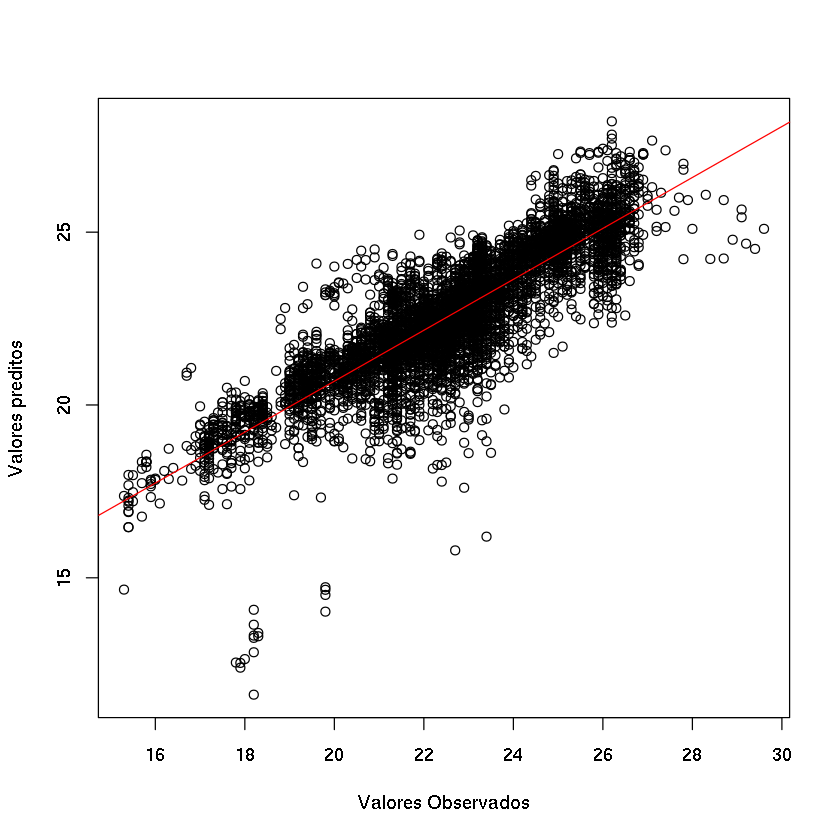

In [12]:
nova_tabela <- data.frame(sst_boia=(tabela$sst_boia), sst_sat=(modelo$fitted.values-273.15))

plot(x=nova_tabela$sst_boia, y=nova_tabela$sst_sat, xlab="Valores Observados", ylab="Valores preditos")
abline(lm(nova_tabela$sst_sat~nova_tabela$sst_boia), col="red")


No gráfico é possível observar uma quantidade de valores afastados da linha de tendência o que leva a crer ainda se tratar de algum ruído, os mais visíveis estão aparentemente agrupados próximos a 18°C, que pode ser um defeito no sensor da boia, ou ainda uma interferência de nuvem que afetou, além do pixel central, os pixeis vizinhos e não foi eliminado no passo anterior, contudo, a grande maioria dos dados seguiram próximos a tendência. Os fatores  após a regressão ficaram sendo <i>A=7685.0, B=0.6255, C=−1.854, D=1.447 e E=−17300.</i>, todos  com  alta significância. Com isso a fórmula inicial foi modificada para:
<br>
$$
SST = A+B*T14+C*(0.99*cos(zen)+0.21)*(T14-T15)+D*(\frac{0.364}{cos(zen)}+0.15)*(T14-T15)^2+E*(\frac{0.327}{cos^2(zen)}+0.11)
$$
<br>

Essa equação foi aplicada na série que foi separada para validação, utilizando os seguintes comandos:

In [13]:
A=7685.0
B=0.6255
C=-1.854
D=1.447
E=-17300.0

var1 <- validacao$ch14
var2 <- (0.99*cos(validacao$sat_zen*0.0174532925)+0.21)*(validacao$ch14-validacao$ch15)
var3 <- (0.364/cos(validacao$sat_zen*0.0174532925)+0.15)*(validacao$ch14-validacao$ch15)^2
var4 <- (0.327/((1+cos(2*validacao$sat_zen*0.0174532925))/2)+0.11)

teste = A+B*var1+C*var2+D*var3+E*var4


Que gerou os seguintes resultados:

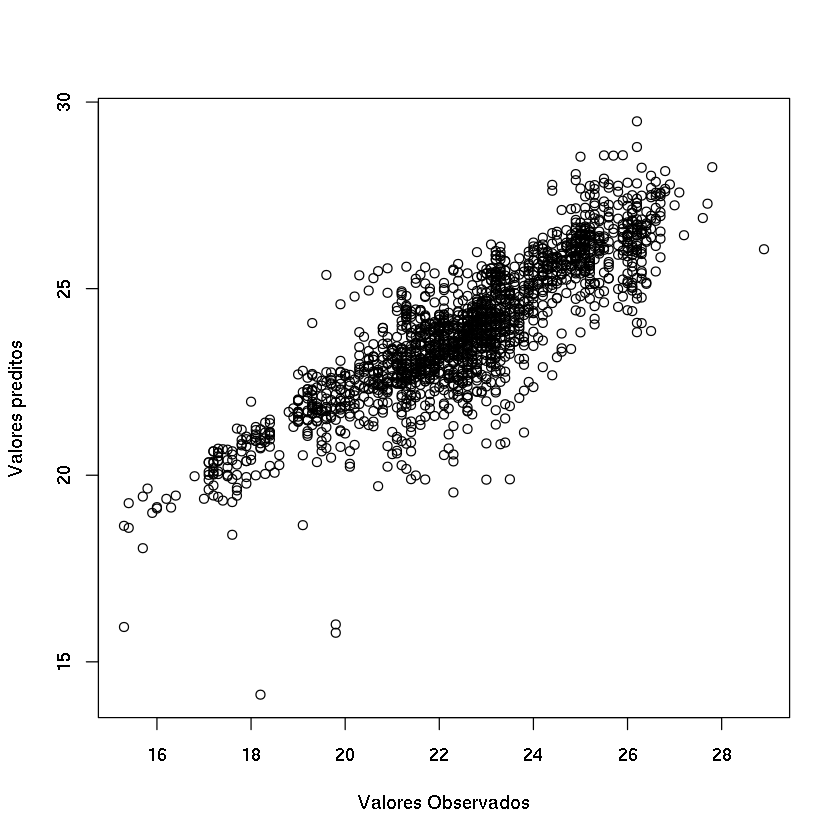

In [14]:
plot(y=teste-273.15, x=validacao$sst_boia, xlab="Valores Observados", ylab="Valores preditos")

Calculando o erro quadrático médio <i>Root-mean-square deviation </i>(RMSE) na coleção resultante, passou de 1.960882°C com a equação original para 1.254711°C na equação ajustada. A equação modificada foi inserida no algoritmo para aplicação em toda a grade com uso do GMT.

O resultado pode ser observado visualmente. Segue abaixo uma comparação entre o mesmo produto, o primeiro a esquerda, gerado com a equação original de Romanera e o segundo, a direita, com a equação modificada, percebe-se que houve uma mudança nos valores de temperatura

<div style="text-align:center">
<img src="img/SST_ori_201801200900.png" width="480" style="float:left">
<img src="img/SST_new_201801200900.png" width="480">
</div>

Visualmente considerando a média climática da região entre 12°C e 30°C, percebe-se que a região Sul da imagem corrigida os valores estão melhores, contudo a região mais ao Norte os valores parecem estar um pouco acima o que pode ser explicado pela posição das boias utilizadas que concentravam-se em sua maioria na região mais ao Sul.



# Conclusão

Este trabalho explorou dois diferentes instrumentos meteorológicos que se complementam,o satélite e as boias meteorológicas. As boias e outros equipamentos como as Plataformade coletas de dados (PCDs) são equipadas com sensores capazes de aferir com precisão uma determinada variável ambiental, como no nosso caso, a temperatura da superfície oceânica. Mas, como são equipamentos limitados a uma pequena área de abrangência, temos os satélites que, por sua vez, são capazes de observar o globo terrestre em sua amplitude, porém suas medições são estimadas e sua qualidade sofre grande influência do ambiente, como posição do sol, ângulo de visada, entre outros. Ao reduzirmos a escala para uma escala regional, reduzimos também essa influência externa e conseguimos ter um produto com mais qualidade. Neste trabalho, conseguimos obter uma melhora na qualidade dos dados, mesmo que pequena, um primeiro passo foi dado. Existem outras componentes que podem ser acrescentadas como medidas de outras bandas espectrais do satélite, outros ângulos, outras boias, médias climatológicas e assim por diante.



# Referências Bibliográficas
<hr style="border:1px solid #0077b9;">

[1]  Stanley Q Kidder, RUSHWORTH M KIDDER, and Thomas H Vonder Haar.Satel-lite meteorology:  an introduction.  Gulf Professional Publishing, 1995.

[2]  A Wada and JCL Chan.  Relationship between typhoon activity and upper oceanheat content.Geophysical Research Letters, 35(17), 2008.

[3]  Xin Li, Chongyin Li, Jian Ling, and Yanke Tan. The relationship between contiguous el niño and la niña revealed by self-organizing maps.Journal of Climate, 28(20):8118–8134, 2015.

[4]  Público. Weather buoy. https://en.wikipedia.org/wiki/Weather_buoy. Acessado em Setembro de 2018.

[5]  University of Rhode Island. Weather buoys. http://www.hurricanescience.org/science/observation/ships/weatherbuoys/. Copyrightc©2010-2015, University of Rhode Island. Acessado em Setembro de 2018.

[6]  DBCP The Data Buoy Cooperation Panel. Data buoy types. http://www.jcommops.org/dbcp/platforms/types.html.c©Copyright JCOMMOPS 2001-2018. Acessado em Setembro de 2018.

[7]  GOOS Brasil. Programa nacional de boias.http://www.goosbrasil.org/pnboia/.c©Copyright 2013–2018 GOOS Brasil. Acessado em Setembro de 2018.

[8]  Lynn Jenner and Brian Dunbar. Goes overview and history.https://www.nasa.gov/content/goes-overview/index.html.  Modificado em 03 de Agosto de 2017, acessado em Setembro de 2018.

[9]  NESDIS. Noaa geostationary satellite programs continuity of weather observations. https://www.nesdis.noaa.gov/sites/default/files/asset/document/GOES_Flyout_Jan_2018_Signed_Linked.pdf. Acessado em Setembro de 2018.

[10]  OSPO. Geostationary operational environmental satellites. https://www.ospo.noaa.gov/Operations/GOES/index.html. Modificado em 29 de Novembro de 2017, acessado em Setembro de 2018.

[11]  NOAA. Goes-east - latest full disk images.https://www.star.nesdis.noaa.gov/GOES/FullDisk.php?sat=G16.  Acessado em Setembro de 2018.

[12]  GOES-R Series Program Office. Mission overview.https://www.goes-r.gov/mission/mission.html. Acessado em Setembro de 2018.

[13]  GOES-R Series Program Office. Instruments: Advanced baseline imager (abi).https://www.goes-r.gov/spacesegment/abi.html. Acessado em Setembro de 2018

[14]  JA Sobrino and M Romaguera. Land surface temperature retrieval from msg1-seviri data.Remote Sensing of Environment, 92(2):247–254, 2004.

[15]  K Masuda, T Takashima, and Y Takayama. Emissivity of pure and sea waters for themodel sea surface in the infrared window regions.Remote Sensing of Environment,24(2):313–329, 1988.

[16]  M Romaguera, JA Sobrino, and F-S Olesen. Estimation of sea surface temperaturefrom seviri data: algorithm testing and comparison with avhrr products.Internati-onal journal of remote sensing, 27(22):5081–5086, 2006.

[17]  University Corporation for Atmospheric Research UNIDATA. C.1 the netcdf-4format. https://www.unidata.ucar.edu/software/netcdf/netcdf-4/newdocs/netcdf/NetCDF_002d4-Format.html. Acessado em Setembro de 2018.

[18]  PROJ contributors.PROJ coordinate transformation software library - Geostatio-nary Satellite View. Open Source Geospatial Foundation, 2018.

[19]  NOAA ”National Oceanic and Atmospheric Administration”.Comprehensive large array-data stewardship  system. https://www.bou.class.noaa.gov/saa/products/welcome. Acessado em Setembro de 2018.

[20]  NOAA, NESDIS, and STAR. Clear sky mask.https://www.star.nesdis.noaa.gov/goesr/product_cp_clearskymask.php.  Modificado em 13 de Junho de 2013,acessado em Setembro de 2018.

[21]  GEOSAT and NIES. Geosat data archive service.https://data2.gosat.nies.go.jp/doc/faq/FAQ_No13_en.pdf.  Copyrightc©National Institute for Environmental Studies. All Rights Reserved. Acessado em Setembro de 2018.

[22]  Robert Levy, Susannah Pearce, and Richard Kleidman.Dark target aerosol retrieval algorithm.https://darktarget.gsfc.nasa.gov/atbd/aerosol-optics-retrieval-strategy. Modificado em 20 de Agosto  de  2018, acessado em Setembro de 2018.

[23]  Marinha do Brasil.  Pnboia - programa nacional de boias.https://www.marinha.mil.br/chm/dados-do-goos-brasil/pnboia.  Acessado em Setembro de 2018.

[24]  WMO World Meteorological Organization. Ois - operational information service. metarea v. http://www.wmo.int/pages/prog/www/ois/Operational_Information/VolumeD/GMDSS/Metarea5/Metarea5.html.c©World Meteorological Organization,7bis, avenue de la Paix, Case postale No.2300,  CH-1211 Geneva 2, Switzerland.Acessado em Setembro de 2018.

[25]  Marinha do Brasil. Metarea v. https://www.marinha.mil.br/chm/sites/www.marinha.mil.br.chm/files/imagens_meteorologia/metarea_v.jpg .Acessado em Setembro de 2018